In [1]:
import radiomics
from radiomics import featureextractoraaf
import SimpleITK as sitk
import six
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import nrrd
import shutil
import cv2
from scipy import stats
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, mean_squared_error, r2_score
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import svm
import tensorflow as tf

In [2]:
from os import listdir
from os.path import isfile, join
import radiomics
from radiomics import featureextractor
import pandas as pd
import seaborn as sns
import nibabel as nib
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import catboost
from catboost import *
import shap
%matplotlib inline
from matplotlib import pyplot as plt

In [81]:
from os import listdir
from os.path import isfile, join
import radiomics
from radiomics import featureextractor
import pandas as pd
import seaborn as sns
import nibabel as nib
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import catboost
from catboost import *
import shap
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
# Redifine Target y
import pandas as pd
df_y = pd.read_csv('C:/Users/jakeylab/Desktop/Zoey/新增資料夾/Data/Patient_slice_record.csv')
df_y = df_y[['Patient_Slice', 'target']]
df_y_new = pd.read_excel('C:/Users/jakeylab/Desktop/Zoey/新增資料夾/Data/MSD_Training_Data_Details.xlsx')
df_y_new['Case'].to_list()


for i in range(df_y.shape[0]):
    a = df_y['Patient_Slice'][i][:-3]
    if(a not in df_y_new['Case'].to_list()):
        df_y['target'][i] = 0

In [25]:
for i in range(df_y.shape[0]):
    a = df_y['Patient_Slice'][i][:-3]
    if(a not in df_y_new['Case'].to_list()):
        df_y['target'][i] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
df_y[df_y['target']==1].reset_index(inplace = True)

In [122]:
df = pd.read_excel('C:/Users/jakeylab/Desktop/Zoey/新增資料夾/Data/2D features_new.xlsx')

for i in range(df.shape[0]):
    df['filename'][i] = df['filename'][i].replace(".nii.gz","")

df = df.merge(df_y, right_on = 'Patient_Slice', left_on = 'filename', how = 'right')

df = df.dropna()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [123]:
df['Patient'] = ''
for i in range(len(df.index)):
    df['Patient'][df.index[i]] = df['filename'][df.index[i]][0:-3]
    if (df['Patient'][df.index[i]][-1] == '_'):
        df['Patient'][df.index[i]]=df['Patient'][df.index[i]][:-1]
        


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [125]:
df = df.drop(columns = ['Unnamed: 0', 'diagnostics_Versions_PyRadiomics',
       'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
       'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
       'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing',
 'diagnostics_Image-original_Size', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing','diagnostics_Mask-original_Size','diagnostics_Mask-original_BoundingBox', 
    'diagnostics_Mask-original_CenterOfMassIndex',	'diagnostics_Mask-original_CenterOfMass', 'Patient_Slice', 'filename'])

In [131]:
import random
#df.sample(15)

In [127]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['target'] = labelencoder.fit_transform(df['target'])

In [195]:
# Train, Val, Test: 6:2:2
random.seed(45)
Cancerous = df_y_new['Case'].to_list()
All = list(dict.fromkeys(df['Patient'].to_list()))

Train = random.sample(All, round(len(All)*0.8))
Test = set(All)-set(Train)

Train_new = random.sample(Train, round(len(Train)*0.8))
Val = set(Train) - set(Train_new)

# Check Cancerous Proportion
print('Train_proportion:', len(set(Train) & set(Cancerous))/len(set(Train)))
print('Test_proportion:', len(set(Test) & set(Cancerous))/len(set(Test)))
print('Val_proportion:', len(set(Val) & set(Cancerous))/len(Val))

In [200]:
Train_new

['pancreas_382',
 'pancreas_105',
 'pancreas_080',
 'pancreas_179',
 'pancreas_347',
 'pancreas_129',
 'pancreas_402',
 'pancreas_262',
 'pancreas_145',
 'pancreas_316',
 'pancreas_091',
 'pancreas_140',
 'pancreas_258',
 'pancreas_119',
 'pancreas_326',
 'pancreas_069',
 'pancreas_120',
 'pancreas_138',
 'pancreas_301',
 'pancreas_259',
 'pancreas_291',
 'pancreas_311',
 'pancreas_122',
 'pancreas_256',
 'pancreas_287',
 'pancreas_276',
 'pancreas_218',
 'pancreas_197',
 'pancreas_114',
 'pancreas_099',
 'pancreas_067',
 'pancreas_215',
 'pancreas_071',
 'pancreas_193',
 'pancreas_376',
 'pancreas_148',
 'pancreas_345',
 'pancreas_369',
 'pancreas_019',
 'pancreas_334',
 'pancreas_204',
 'pancreas_224',
 'pancreas_247',
 'pancreas_284',
 'pancreas_388',
 'pancreas_083',
 'pancreas_089',
 'pancreas_172',
 'pancreas_357',
 'pancreas_092',
 'pancreas_356',
 'pancreas_414',
 'pancreas_261',
 'pancreas_231',
 'pancreas_380',
 'pancreas_046',
 'pancreas_295',
 'pancreas_041',
 'pancreas_028

In [214]:
# Train, Val, Test Split
X_test = df[df.Patient.isin(Test)].drop(columns = ['Patient','target'],axis=1)
X_train =df[df.Patient.isin(Train_new)].drop(columns = ['Patient','target'],axis=1)
X_val = df[df.Patient.isin(Val)].drop(columns = ['Patient','target'],axis=1)


y_test = df[df.Patient.isin(Test)][['target']]
y_train =df[df.Patient.isin(Train_new)][['target']]
y_val = df[df.Patient.isin(Val)][['target']]

### Model Building

In [215]:
## Regression Model for Random Foreest
rf = RandomForestRegressor(n_estimators=1000,max_features='auto')
rf.fit(X_train, y_train)
#y_val = np.array(y_val)
predictions_val = rf.predict(X_val)
predictions_val= (predictions_val>0.5)
predictions_test = rf.predict(X_test)
predictions_test= (predictions_test>0.5)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [216]:
from sklearn.metrics import classification_report,confusion_matrix
# View accuracy score
print("Accuracy on validation set: {:.3f}".format(accuracy_score(y_val, predictions_val)))
print(confusion_matrix(y_val,predictions_val))
print(classification_report(y_val,predictions_val))

Accuracy on validation set: 0.710
[[154  73]
 [ 60 172]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       227
           1       0.70      0.74      0.72       232

    accuracy                           0.71       459
   macro avg       0.71      0.71      0.71       459
weighted avg       0.71      0.71      0.71       459



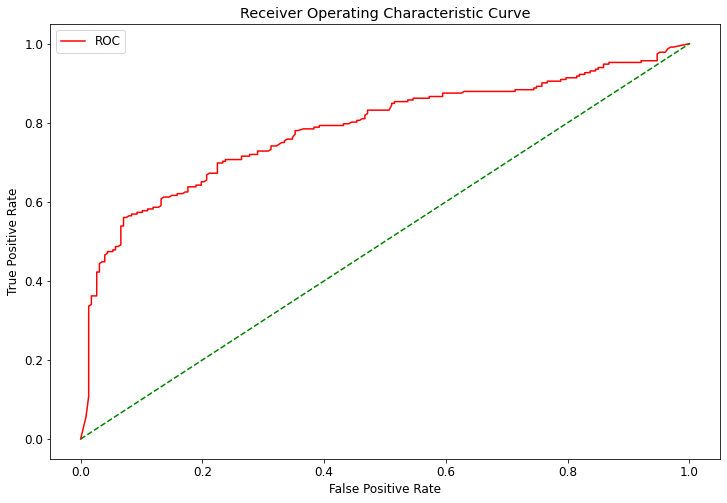

0.7853182439617197


In [258]:
# ROC For Doctors
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = rf.predict(X_val)
fper, tper, thresholds = roc_curve(y_val, predicted_prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))

In [217]:
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, predictions_test)))
print(confusion_matrix(y_test,predictions_test))
print(classification_report(y_test,predictions_test))

Accuracy on test set: 0.798
[[134  66]
 [ 36 268]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       200
           1       0.80      0.88      0.84       304

    accuracy                           0.80       504
   macro avg       0.80      0.78      0.78       504
weighted avg       0.80      0.80      0.79       504



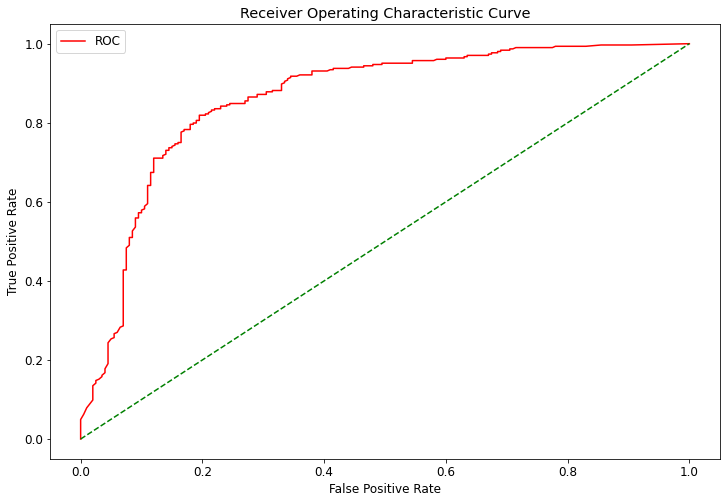

0.8611101973684211


In [259]:
# ROC For Doctors
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = rf.predict(X_test)
fper, tper, thresholds = roc_curve(y_test, predicted_prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))

<BarContainer object of 29 artists>

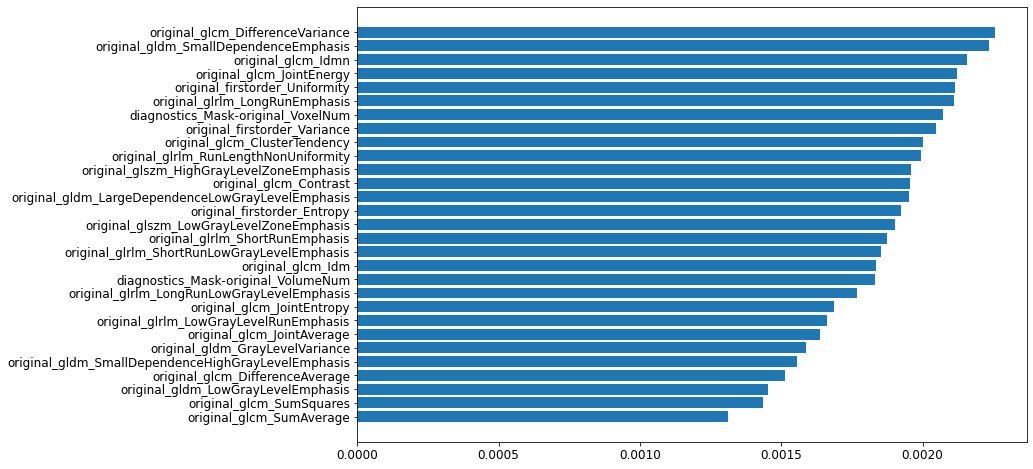

In [218]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 12})
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][1:30], rf.feature_importances_[sorted_idx][1:30])

In [219]:
categorical_features_indices = np.where(X_train.dtypes != float)[0]

In [220]:
model = CatBoostClassifier(
    custom_loss=[catboost.metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent',iterations=75
)

In [221]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_val, y_val),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [227]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': catboost.metrics.Logloss()
})
cv_data = cv(
    Pool(df.drop(columns = ['target','Patient'],axis=1), df['target'], cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [228]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))


Best validation accuracy score: 0.89±0.01 on step 74
Precise validation accuracy score: 0.8864197530864196


In [230]:
import hyperopt
categorical_features_indices = np.where(X_train.dtypes != float)[0]
def hyperopt_objective(params):
    best_model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=50,
        eval_metric=catboost.metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=catboost.metrics.Logloss(),
    )
    
    cv_data = cv(
        Pool(X_train, y_train, cat_features=categorical_features_indices),
        best_model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [231]:
seed=45

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed),
)

print(best)

100%|███████████████████████████████████████████████| 50/50 [00:38<00:00,  1.30trial/s, best loss: 0.07089456956808016]
{'l2_leaf_reg': 3.0, 'learning_rate': 0.19909849990184375}


In [232]:
best_model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=100,
    eval_metric=catboost.metrics.Accuracy(),
    random_seed=42,
    verbose=False,
    loss_function=catboost.metrics.Logloss())
cv_data = cv(Pool(X_train, y_train, cat_features=categorical_features_indices), best_model.get_params())

Training on fold [0/3]

bestTest = 0.9346938776
bestIteration = 58

Training on fold [1/3]

bestTest = 0.9345603272
bestIteration = 84

Training on fold [2/3]

bestTest = 0.9303278689
bestIteration = 94



In [233]:
best_model.fit(X_train, y_train, cat_features=categorical_features_indices)

In [253]:
# Evaluatin
predict = best_model.predict(X_val)
print(confusion_matrix(y_val,predict))
print(classification_report(y_val,predict))

[[139  88]
 [ 53 179]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       227
           1       0.67      0.77      0.72       232

    accuracy                           0.69       459
   macro avg       0.70      0.69      0.69       459
weighted avg       0.70      0.69      0.69       459



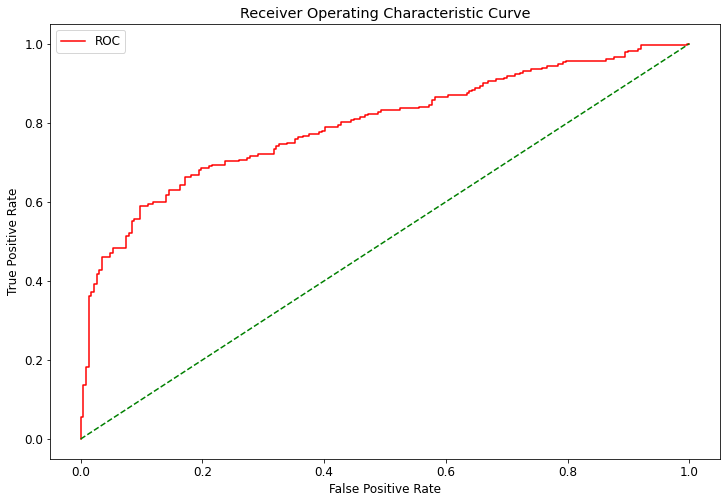

0.7938629804040711


In [254]:
# ROC For Doctors
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = best_model.predict_proba(X_val)
prob = predicted_prob[:, 1]
fper, tper, thresholds = roc_curve(y_val, prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))

In [234]:
# Evaluatin
predict = best_model.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[139  61]
 [ 33 271]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       200
           1       0.82      0.89      0.85       304

    accuracy                           0.81       504
   macro avg       0.81      0.79      0.80       504
weighted avg       0.81      0.81      0.81       504



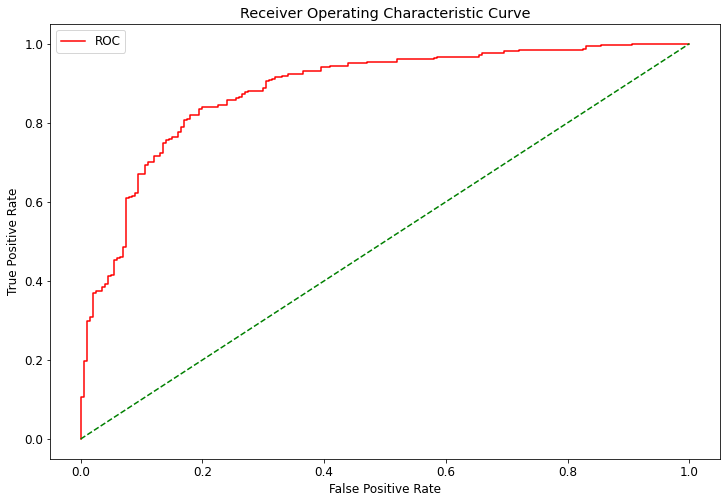

0.8826480263157894


In [252]:
# ROC For Doctors
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = best_model.predict_proba(X_test)
prob = predicted_prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))

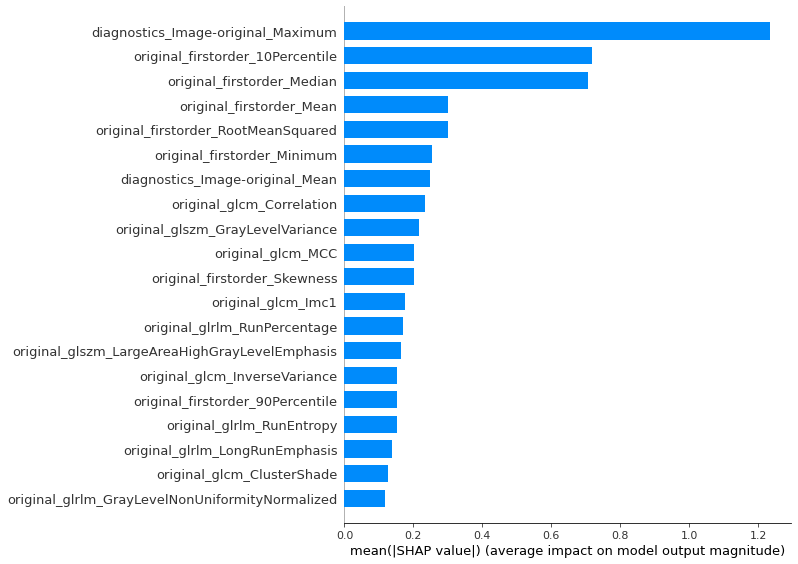

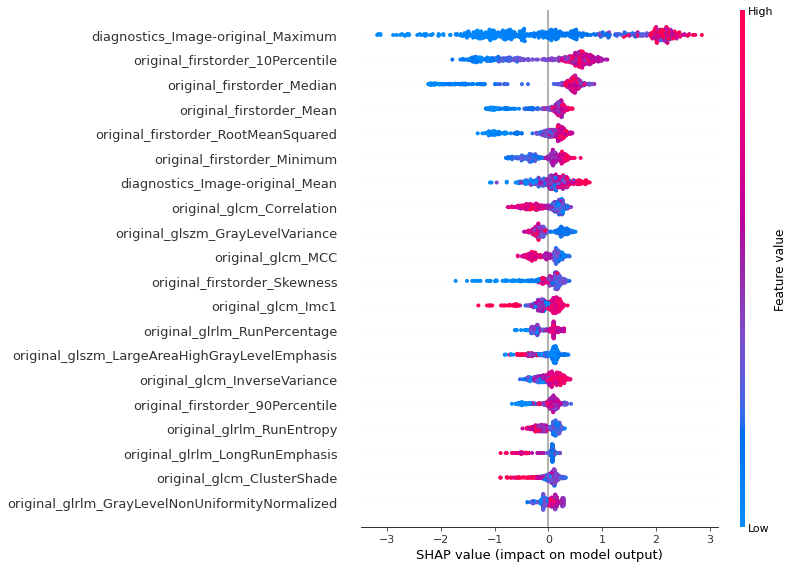

In [236]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [247]:
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
random.seed(45)
# 建立 XGBClassifier 模型
xgboostModel = xgb.XGBClassifier(n_estimators=120, learning_rate= 0.3,max_depth=6)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)
print("Accuracy on training set: {:.3f}".format(xgboostModel.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(xgboostModel.score(X_val, y_val)))
xgb_predict=xgboostModel.predict(X_val)
print(confusion_matrix(y_val,xgb_predict))
print(classification_report(y_val,xgb_predict))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[14:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set: 1.000
Accuracy on validation set: 0.697
[[138  89]
 [ 50 182]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       227
           1       0.67      0.78      0.72       232

    accuracy                           0.70       459
   macro avg       0.70      0.70      0.69       459
weighted avg       0.70      0.70      0.69       459



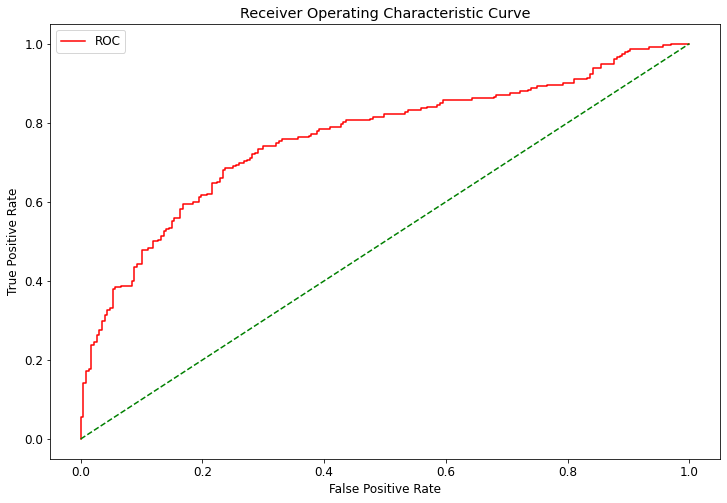

0.7612980404071092


In [251]:
# ROC For Doctors
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = xgboostModel.predict_proba(X_val)
prob = predicted_prob[:, 1]
fper, tper, thresholds = roc_curve(y_val, prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))

In [248]:
print("Accuracy on test set: {:.3f}".format(xgboostModel.score(X_test, y_test)))
xgb_predict=xgboostModel.predict(X_test)
print(confusion_matrix(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

Accuracy on test set: 0.802
[[137  63]
 [ 37 267]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       200
           1       0.81      0.88      0.84       304

    accuracy                           0.80       504
   macro avg       0.80      0.78      0.79       504
weighted avg       0.80      0.80      0.80       504



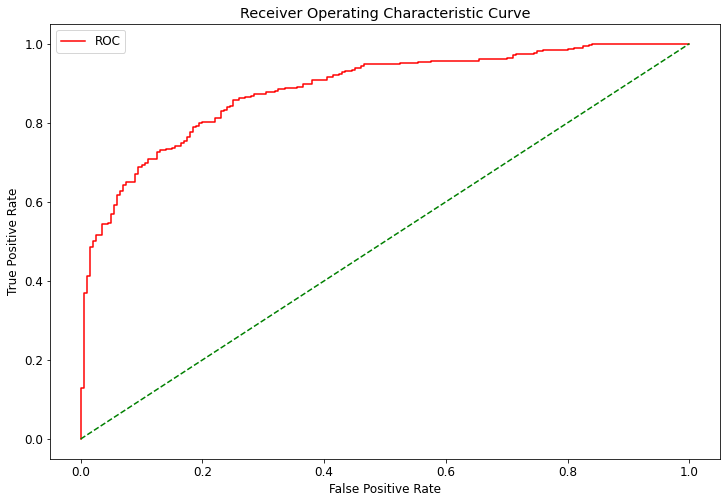

0.8837499999999999


In [250]:
# ROC For Doctors
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = xgboostModel.predict_proba(X_test)
prob = predicted_prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))

In [249]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {'objective':'binary:logistic','eval_metric':'logloss',
          'eta':0.01,
          'subsample':0.1}
xgb_cv = xgb.cv(dtrain=data_dmatrix,params=params,nfold=5,metrics='auc',seed=42)
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.856227,0.019973,0.836763,0.021618
1,0.901209,0.011523,0.884867,0.024005
2,0.916988,0.006897,0.898731,0.014816
3,0.924239,0.001876,0.906638,0.016563
4,0.931669,0.002321,0.917405,0.013656


In [264]:
## Tuning Parameter for follwoing Stack Model
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import accuracy_score
import time
from sklearn import ensemble
from skopt import BayesSearchCV

# define search space
start = time.time()
parameters = {"eta": (0.001, 0.4),
              "gamma": (0, 20),
              "max_depth": (1, 2000),
             "learning_rate": (0,1),
             'subsample': (0.4, 1.0),
            'colsample_bytree' :(0.4, 1.0)}
# define the search
f = make_scorer(recall_score , average='macro')
search = BayesSearchCV(estimator=xgb.XGBClassifier(eval_metric='logloss', objective = 'binary:logistic'), search_spaces=parameters, n_jobs=-1, n_iter=9, scoring=f)
# perform the search
search.fit(X_train, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)
print("Time Spent:", time.time()-start)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.8008612032976439
OrderedDict([('colsample_bytree', 0.6527955252235624), ('eta', 0.2716080870711154), ('gamma', 18), ('learning_rate', 1), ('max_depth', 1680), ('subsample', 0.5925803680497616)])
Time Spent: 11.522448301315308


In [265]:
## Stack Model
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)

estimators = [
    ('rf', RandomForestClassifier()),
    ('svc', svm.SVC(C=0.531560776493037,degree=2,gamma=8.270141030499328e-05)),
    ('knn', KNeighborsClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('et', ExtraTreesClassifier()),
    ('xgb',xgb.XGBClassifier(colsample_bytree=0.6527955252235624,eta=0.2716080870711154,gamma=18,n_estimators=100, learning_rate= 1,max_depth=1680,subsample=0.5925803680497616, use_label_encoder = False, eval_metric='logloss'))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator= xgb.XGBClassifier(n_estimators=100, learning_rate= 0.3, use_label_encoder = False, eval_metric='logloss')
)

clf.fit(X_train,y_train).score(X_test,y_test)

predicted = clf.predict(X_train)
print('訓練集準確率: ',accuracy_score(y_train, predicted))
predicted = clf.predict(X_test)
print('測試集準確率:',accuracy_score(y_test, predicted))

predicted = clf.predict(X_train)
print('訓練Recall Rate: ',recall_score(y_train, predicted))
predicted = clf.predict(X_test)
print('測試集Recall Rate:',recall_score(y_test, predicted))

predicted = clf.predict(X_train)
print('訓練f1_score: ',f1_score(y_train, predicted))
predicted = clf.predict(X_test)
print('測試集f1_score:',f1_score(y_test, predicted))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


訓練集準確率:  0.9468302658486708
測試集準確率: 0.7896825396825397
訓練Recall Rate:  0.9625
測試集Recall Rate: 0.9177631578947368
訓練f1_score:  0.9559819413092551
測試集f1_score: 0.8403614457831325


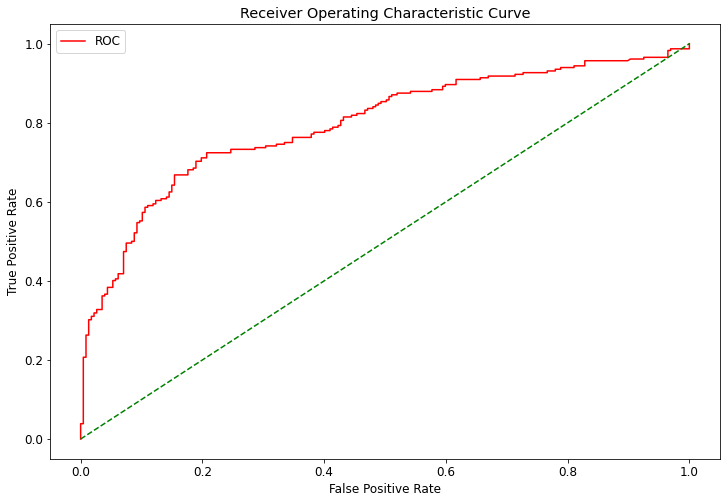

0.7961130943338903


In [267]:
# ROC For Doctors: Val Set in Stacking Model
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = clf.predict_proba(X_val)
prob = predicted_prob[:, 1]
fper, tper, thresholds = roc_curve(y_val, prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))

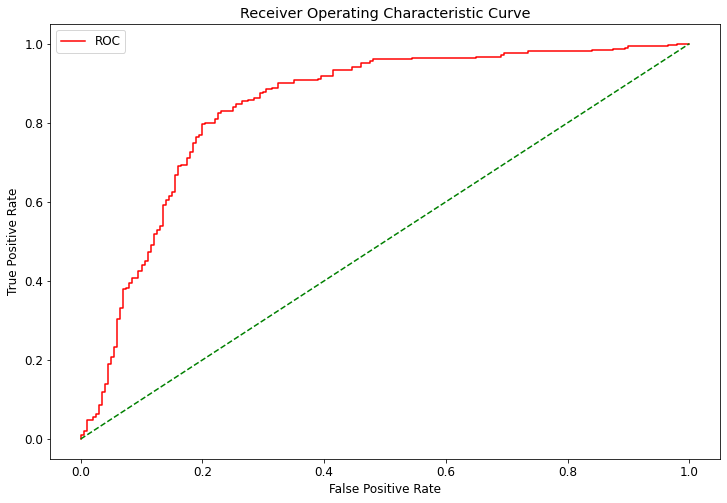

0.8394078947368422


In [266]:
# ROC For Doctors: Testing Set in Stacking Model
from sklearn.metrics import roc_curve, auc
# ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
predicted_prob = clf.predict_proba(X_test)
prob = predicted_prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)
print(auc(fper, tper))